## Zafar Mahmood
## 271325
## 31 Aug 2017

In [99]:
import numpy as np
import wikipedia
import nltk 
from nltk import word_tokenize, pos_tag, ne_chunk ,sent_tokenize
from nltk.chunk import conlltags2tree, tree2conlltags
from nltk.corpus import stopwords

from collections import Iterable

from sklearn.model_selection import train_test_split

In [100]:
from wordcloud import WordCloud, STOPWORDS
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
from subprocess import check_output



In [101]:

data = []

with open("MinedData.txt","r") as f:
    for line in f:
        data.append(line)


print(len(data))
temp_data = data

12761


In [112]:
1496 * 0.8

train = data[0:1196]
test = data[1196::]
len(train)+len(test)


12761

# Data Statistics 
    -> Number of Documents 
    -> Number of Tokens 
    -> Word Cloud 
    -> Most types of Name Entities 
    


In [102]:
print("Topic theme : Mugal Empires ")
print ("Number of Documents : ", 194 )

tokenized_data = []
total_count  = 0
for line in data:
    tokenized_data.append(nltk.word_tokenize(line))   
    total_count += len(nltk.word_tokenize(line))

## Total Tokens 
print("Total tokens : ", total_count)

Topic theme : Mugal Empires 
Number of Documents :  194
Total tokens :  289082


In [103]:
new_list = []
def my_fun(temp_list):
    for ele in temp_list:
        if type(ele) == list:
            my_fun(ele)
        else:
            new_list.append(ele)

In [104]:
#Tokenize the data 

my_fun(tokenized_data)
word_dist_mb = nltk.FreqDist(new_list)
mft = nltk.FreqDist(new_list).max()
print('Total Number of Tokens ',len(new_list))
print('Types:',word_dist_mb.B())
print('Hapax Legomena:',len(word_dist_mb.hapaxes()))
print('Most frequent token: [',word_dist_mb.max() ,'] total count (',word_dist_mb[mft],')')
print('Most common tokens:\n',word_dist_mb.most_common(10))

Total Number of Tokens  289082
Types: 25653
Hapax Legomena: 14350
Most frequent token: [ , ] total count ( 15526 )
Most common tokens:
 [(',', 15526), ('the', 15325), ('.', 11892), ('of', 10476), ('(', 7586), (')', 7572), ('and', 5780), ('to', 5174), ('in', 3825), ('Emperor', 3355)]


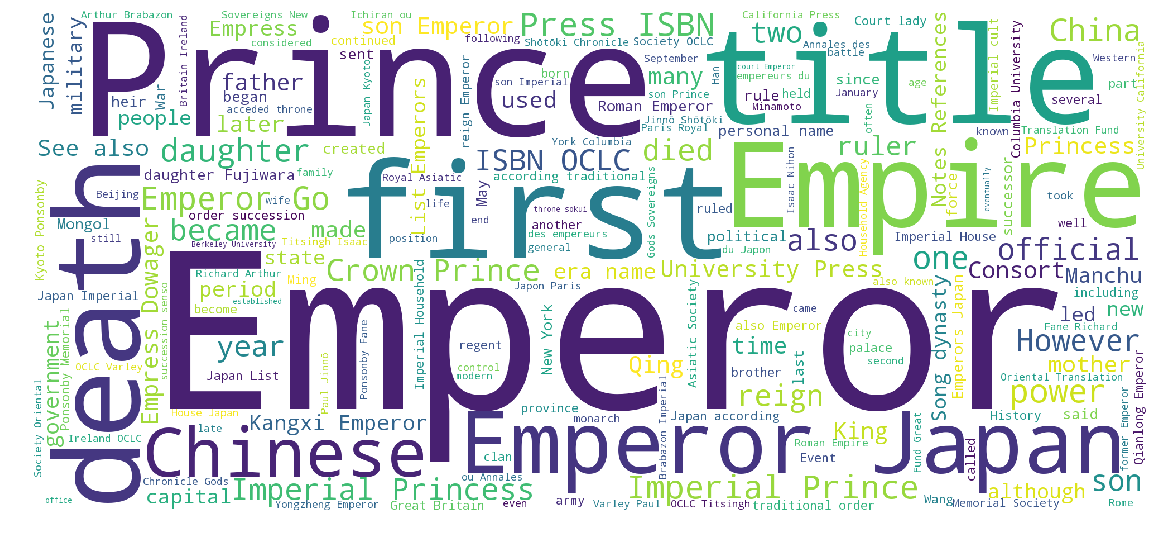

In [105]:
## Just A simple wordCloud Using this Data 

stopwords = set(STOPWORDS)
text = open('MinedData.txt' , 'r') 
wc_data = text.read()
%matplotlib inline
plt.figure(figsize=(20,20))
wc = WordCloud(background_color="white", 
               stopwords=stopwords,
                random_state=42,
               mode="RGB", 
               width=2000,height=900).generate(wc_data)
plt.title=("Complete Data WordCloud")
plt.imshow(wc)
plt.axis("off")
plt.show()

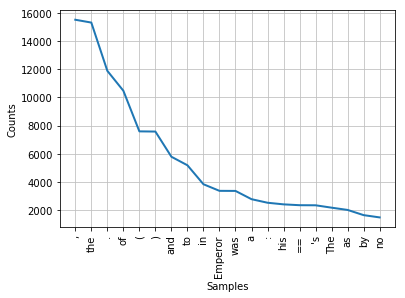

In [106]:
word_dist_mb.plot(20,cumulative=False)

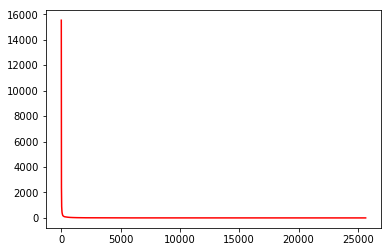

In [107]:
%matplotlib inline
import matplotlib.pyplot as plt

wfreq_list = [(w,word_dist_mb[w]) for w in word_dist_mb]
wfreq_list = sorted(wfreq_list,key = lambda x:x[1],reverse = True)

plt.plot([f for w,f in wfreq_list], 'r')

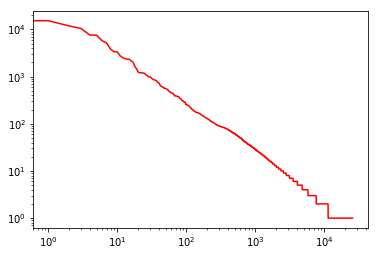

In [108]:
plt.plot([f for w,f in wfreq_list], 'r')
plt.yscale('log')
plt.xscale('log')
plt.show()

In [109]:
NameEntities = []
for entity in ne_chunk(pos_tag(new_list)):
    if type(entity[0]) != str :
        NameEntities.append(entity) 

Given below are teh Named Entities  by NLTK , just too see a small chunk 

In [110]:
NameEntities[:50]

[Tree('PERSON', [('Old', 'NNP'), ('French', 'NNP')]),
 Tree('GPE', [('Latin', 'NNP')]),
 Tree('PERSON', [('Empress', 'NNP')]),
 Tree('GPE', [('Europe', 'NNP')]),
 Tree('GPE', [('Emperor', 'NNP')]),
 Tree('GPE', [('Middle', 'NNP'), ('Ages', 'NNP')]),
 Tree('GPE', [('Pope', 'NNP')]),
 Tree('ORGANIZATION', [('Church', 'NNP')]),
 Tree('ORGANIZATION', [('Catholic', 'NNP')]),
 Tree('GPE', [('Western', 'NNP'), ('Europe', 'NNP')]),
 Tree('ORGANIZATION', [('Emperor', 'NNP')]),
 Tree('GPE', [('Japan', 'NNP')]),
 Tree('GPE', [('English', 'NNP')]),
 Tree('GPE', [('British', 'JJ')]),
 Tree('GPE', [('British', 'JJ')]),
 Tree('GPE', [('India', 'NNP')]),
 Tree('GPE', [('India', 'NNP')]),
 Tree('LOCATION', [('Western', 'JJ'), ('Europe', 'NNP')]),
 Tree('PERSON', [('Emperor', 'NNP')]),
 Tree('ORGANIZATION', [('Holy', 'NNP'), ('Roman', 'NNP'), ('Emperor', 'NNP')]),
 Tree('LOCATION', [('Western', 'NNP'), ('Roman', 'NNP')]),
 Tree('GPE', [('Roman', 'NNP')]),
 Tree('ORGANIZATION', [('Central', 'NNP'), ('Eur

## Lost of false positives have been seen here. 

Now Rule Based Annotator is Done here , 
1.2 Different Small Chunk Grammar Used of created Train and Test data set (above)


First Grammar is preety simple on used On POS tags 
grammar = "NP: {DT?JJ*NN}"  mentioning optional DT , Followed By JJ Adjective's then Followed By NN nouns  



Now I started with a small data , giving a small portion to make the system workable 

In [113]:
train[0]

'An emperor (through Old French empereor from Latin imperator) is a monarch, usually the sovereign ruler of an empire or another type of imperial realm. Empress, the female equivalent, may indicate an emperor\'s wife (empress consort), mother (empress dowager), or a woman who rules in her own right (empress regnant). Emperors are generally recognized to be of a higher honour and rank than kings. In Europe the title of Emperor has been used since the Middle Ages, considered in those times equal or almost equal in dignity to that of Pope, due to the latter\'s position as visible head of the Church and spiritual leader of the Catholic part of Western Europe. The Emperor of Japan is the only currently reigning monarch whose title is translated into English as "Emperor".\n'



Tested a small rule first over teh given data-set for parsing, to see how  much the parsing method is effective

In [40]:
grammar = r"""
  NP: {<DT|PP\$>?<JJ>*<NN.*>}   # chunk determiner/possessive, adjectives and noun
"""

train[0]
cp = nltk.RegexpParser(grammar)
tagged_tokens = nltk.pos_tag(nltk.word_tokenize(train[1]))

tree = cp.parse(tagged_tokens)
tree.draw()
#nltk.chunk.conllstr2tree(cp.parse(tagged_tokens), chunk_types=['NP']).draw()

In [41]:
nltk.pos_tag(new_list[0:5])

[('An', 'DT'),
 ('emperor', 'NN'),
 ('(', '('),
 ('through', 'IN'),
 ('Old', 'NNP')]

In [27]:
chk = ne_chunk(pos_tag(filetered_stop_words) ,binary=True)
chk.draw()

In [40]:

#tree2conlltags(ne_chunk(pos_tag(filetered_stop_words), binary=True))

[('Both', 'DT', 'O'),
 ('kings', 'NNS', 'O'),
 ('emperors', 'NNS', 'O'),
 ('monarchs', 'VBP', 'O'),
 (',', ',', 'O'),
 ('emperor', 'NN', 'O'),
 ('empress', 'NN', 'O'),
 ('considered', 'VBD', 'O'),
 ('higher', 'JJR', 'O'),
 ('monarchical', 'JJ', 'O'),
 ('titles', 'NNS', 'O'),
 ('.', '.', 'O'),
 ('In', 'IN', 'O'),
 ('much', 'JJ', 'O'),
 ('strict', 'JJ', 'O'),
 ('definition', 'NN', 'O'),
 ('emperor', 'NN', 'O'),
 (',', ',', 'O'),
 ('emperor', 'NN', 'O'),
 ('relations', 'NNS', 'O'),
 ('implying', 'VBG', 'O'),
 ('superiority', 'NN', 'O'),
 ('ruler', 'NN', 'O'),
 (',', ',', 'O'),
 ('typically', 'RB', 'O'),
 ('rules', 'NNS', 'O'),
 ('one', 'CD', 'O'),
 ('nation', 'NN', 'O'),
 ('.', '.', 'O'),
 ('Thus', 'NNP', 'O'),
 ('king', 'NN', 'O'),
 ('might', 'MD', 'O'),
 ('obliged', 'VB', 'O'),
 ('pay', 'VB', 'O'),
 ('tribute', 'NN', 'O'),
 ('another', 'DT', 'O'),
 ('ruler', 'NN', 'O'),
 (',', ',', 'O'),
 ('restrained', 'VBD', 'O'),
 ('actions', 'NNS', 'O'),
 ('unequal', 'JJ', 'O'),
 ('fashion', 'NN', '

# Rule Based Annotators 


Lists for Named , Regions and word check of some action

In [132]:
def calPrecisionandRecall(tp,fp,fn) :
    precision = tp / (tp + fp )
    recall = tp/(tp + fn)
    
    return (precision , recall)

In [133]:

## Grammar 

grammar =r"""
 
 NE: {<DT|PP\$>?<JJ>*<NN>+}   # chunk determiner/possessive, adjectives and noun
     {<DT|PP\$>?<JJ>*<NN>+<DT|PP\$>?<JJ>?<NN>?}   # Continouschunk determiner/possessive, adjectives and noun
     {<NNP>+} # Proper Nouns
     {<VBG>}  # 
"""
            
index = 0

## Intialize F-1 measure parameters

TP = FP = FN = 0


cp = nltk.RegexpParser(grammar)


## Now take each document from Data , 
## Then Token each sentence from that Document 
## Parse That Document using given Grammar 
## Get Similar Solution as reference From NLTK 


for document in data:

    for line in sent_tokenize(document) :

        tagged_tokens = nltk.pos_tag(nltk.word_tokenize(line))
        true_labels = tree2conlltags(ne_chunk(pos_tag(word_tokenize(line)))) 
        treeOfLine = cp.parse(tagged_tokens)
        tree_iob = list(tree2conlltags(treeOfLine))
        #print("before \n\n %s"%(tree_iob))


        ## Now Checking from Parsed Grammer , Either is there any False Poistives for the correction , 
        ## via NLTK solution
        
        for index,item in enumerate(tree_iob):
            check = 0 
            #print("True labeled :",(true_labels[index]))
            temp_item = list(item)
            temp_true_label = list(true_labels[index])
            
            ## Checking either is there ' FN '
            
            if (temp_true_label[2] != 'O' and temp_item[2] == 'O'):
                FN += 1 
            if 'NE' in temp_item[2] :
                
                ## Only triving in those who are declared as Named Entities by Grammar 
                ## Giving The label To those Named Entities Who have profound meaning of their words containt ' ing '
    
                if 'ing' in item[0]:
                    #print(temp_item)
                    temp_item[2] = 'B-ART'
                    TP += 1

                    tree_iob[index] = temp_item
                else : 
                    
                    ## Checking for ' FP '
                    
                    if (temp_true_label[2] == 'O') :
                        
                        temp_item[2] = temp_true_label[2]
                        tree_iob[index] = temp_item
                        FP += 1
                    
                    else :
                        
                        ## Else giving the label given by the NE of NLTK , also counting it as True Positive 
                        temp_item[2] = temp_true_label[2]
                        tree_iob[index] = temp_item
                        TP += 1
                        #print("NLKT Label : %s  , orginal Entity :%s "%(temp_true_label,temp_item))
                #print(tree_iob[index])
            #print("NLKT Label : %s  , orginal Entity :%s "%(temp_true_label,temp_item))
        #print("\n\n\nAfter %s "%(tree_iob))
        tree_iob = conlltags2tree(tuple(tree_iob))
        #tree_iob.draw()
    
    


_precision , _recall = calPrecisionandRecall(TP,FP,FN)


## Finally After counting it with complete Data , we calculate Precision and Recall

print("TP :%s , FP :%s , FN :%s"%(TP,FP,FN))
print(" Precision : %s , Recall : %s "%(_precision , _recall)) 
      
   

TP :47659 , FP :60601 , FN :1374
 Precision : 0.44022723074080916 , Recall : 0.9719780555952114 


# Classifier Based Method



#### THis Method is using Deceision Tree by making feature vectors 


In [114]:

## Creating the lookup varaibles for get integer value 

_presentTag= []
_wordLabel = []
_iobTag = []

def wordLabel (wrd) :
    if (wrd in _wordLabel):
            return(_wordLabel.index(wrd))
    else :
        _wordLabel.append(wrd)
        return(_wordLabel.index(wrd))
    


def posTagLabel (tag) :
    if (tag in _presentTag):
            return(_presentTag.index(tag))
    else :
        _presentTag.append(tag)
        return(_presentTag.index(tag))
    
def iobTagLabel (_iob):
    if (_iob in _iobTag ) : 
        return (_iobTag.index(_iob))
    else :
        _iobTag.append(_iob)
        return (_iobTag.index(_iob))

    
## Caling each item and then receving a complete feature vector , after seperating each item from touple

def make_feature_vector (item, item_1 , item_2 , labl):
    #print(" item_1 %s , item_2 %s , item_3 %s " % ( item , item_1 , item_2))
    w , w_pos , w_iob = map(str, item)
    w_1 , w_pos_1 , w_iob_1 = map (str , item_1)
    w_2 , w_pos_2 , w_iob_2 = map(str, item_2)
    
    ## Returning complete Feature vector
    ## where 1 , 2 represents previous and previous previous item and history
    return wordLabel(w), posTagLabel(w_pos) , iobTagLabel(w_iob) , posTagLabel(w_pos_1) , iobTagLabel(w_iob_1), posTagLabel(w_pos_2) , iobTagLabel(w_iob_2) , nltk_get_true_target(labl) , w_iob 


def nltk_get_true_target (indx):
    
    ## Getting the true label from NLTK
    
    try :
        return list(indx)[2].split('-')[1]
    
        #print(list(indx)[2].split('-')[1] , " this is first ", iob)
    except :
        #print(list(indx)[2][0] , " this is second ",iob)
        return list(indx)[2][0]

In [115]:
grammar =r"""
 
 NE: {<DT|PP\$>?<JJ>*<NN>+}   # chunk determiner/possessive, adjectives and noun
     {<DT|PP\$>?<JJ>*<NN>+<DT|PP\$>?<JJ>?<NN>?}   # chunk determiner/possessive, adjectives and noun in continous 
     {<NNP>+}
     {<VBG>}
"""
            
featuresVector = []
index = 0
item_1 = ""
item_2 = ""


cp = nltk.RegexpParser(grammar)
for document in data:
    for line in sent_tokenize(document) :
        
        ## Same Getting each document from Data 
        ## Parsing it with grammar to keep the count for F-1 measure

        tagged_tokens = nltk.pos_tag(nltk.word_tokenize(line))
        true_labels = tree2conlltags(ne_chunk(pos_tag(word_tokenize(line)))) 
        treeOfLine = cp.parse(tagged_tokens)
        d = tree2conlltags(treeOfLine)
        #print(len(d))    
        #print(d)

        for (i,item) in enumerate(tree2conlltags(treeOfLine)):
            
            ## Iterate in the tree , keeping the history 
            ## and make feature vector 
            if(index == 0 ):
                item_1 = item 
            if (index == 1):
                item_2 = item_1
                item_1 = item
            if(index >= 2) :
                featuresVector.append(make_feature_vector(list(item) , list(item_1) , list(item_2) , true_labels[i]))  
                item_2 = item_1
                item_1 = item 
            index += 1    


[(0, 0, 0, 1, 0, 2, 0, 'O', 'O'),
 (1, 3, 0, 0, 0, 1, 0, 'O', 'O'),
 (2, 4, 0, 3, 0, 0, 0, 'O', 'O'),
 (3, 3, 0, 4, 0, 3, 0, 'O', 'O'),
 (4, 5, 1, 3, 0, 4, 0, 'O', 'B-NE'),
 (5, 6, 0, 5, 1, 3, 0, 'O', 'O'),
 (6, 7, 1, 6, 0, 5, 1, 'O', 'B-NE'),
 (5, 6, 0, 7, 1, 6, 0, 'O', 'O'),
 (7, 7, 1, 6, 0, 7, 1, 'O', 'B-NE'),
 (5, 6, 0, 7, 1, 6, 0, 'O', 'O'),
 (8, 5, 1, 6, 0, 7, 1, 'O', 'B-NE'),
 (5, 6, 0, 5, 1, 6, 0, 'O', 'O'),
 (9, 5, 1, 6, 0, 5, 1, 'O', 'B-NE'),
 (5, 6, 0, 5, 1, 6, 0, 'O', 'O'),
 (10, 5, 1, 6, 0, 5, 1, 'O', 'B-NE'),
 (5, 6, 0, 5, 1, 6, 0, 'O', 'O'),
 (11, 8, 1, 6, 0, 5, 1, 'ORGANIZATION', 'B-NE'),
 (5, 6, 0, 8, 1, 6, 0, 'O', 'O'),
 (12, 8, 1, 6, 0, 8, 1, 'GPE', 'B-NE'),
 (5, 6, 0, 8, 1, 6, 0, 'O', 'O'),
 (13, 7, 1, 6, 0, 8, 1, 'O', 'B-NE'),
 (14, 9, 0, 7, 1, 6, 0, 'O', 'O'),
 (15, 10, 0, 9, 0, 7, 1, 'O', 'O'),
 (16, 11, 1, 10, 0, 9, 0, 'O', 'B-NE'),
 (17, 5, 2, 11, 1, 10, 0, 'O', 'I-NE'),
 (18, 8, 1, 5, 2, 11, 1, 'ORGANIZATION', 'B-NE'),
 (5, 6, 0, 8, 1, 5, 2, 'O', 'O'),
 (19, 8

In [116]:
def determine_F1_measure (y_actual, y_hat , selected):
    
    ## Fuction for the calculation of TP ,PF , FN to determing F-1 measure

    TP = 0
    FP = 0
    FN = 0

    for i in range(0,len(y_hat)): 
        if 'NE' in selected[i] and y_actual[i] == y_hat[i]:
            TP += 1
    for i in range(0,len(y_hat)): 
        if 'NE' in selected[i] and y_actual[i] != y_hat[i]:
            FP += 1
    #for i in range(0,len(y_hat)): 
        #if y_actual[i]==y_hat[i]==0:
            #TN += 1
    for i in range(0,len(y_hat)): 
        if 'NE' not in selected[i] and y_hat[i] != 'O':
            FN += 1

    return(TP, FP, FN)

In [117]:
## Sepeating the dataset to train and test

train, test = train_test_split(pd.DataFrame(featuresVector), test_size = 0.2)
train_x = train.iloc[:,0:np.shape(train)[1] -2]
train_y = train.iloc[:,np.shape(train)[1]-2]
train_selected_words = train.iloc[:,np.shape(train)[1]-1]


test_x = test.iloc[:,0:np.shape(test)[1] -2]
test_y = test.iloc[:,np.shape(test)[1]-2]
test_selected_words = test.iloc[:,np.shape(test)[1]-1]


print(np.shape(train_x) , np.shape(test_x))


(231295, 7) (57824, 7)


In [118]:
type(test_selected_words)

pandas.core.series.Series

In [119]:
from sklearn import tree

## Intilizting the decision tree method .

_model = tree.DecisionTreeClassifier()
_model

_model.fit(train_x,train_y)

prediction = _model.predict(test_x)

TP , FP , FN = determine_F1_measure (list(test_y), list(prediction) , list(test_selected_words)) 
#print(test_x[0])
#print(prediction)


In [120]:
print(TP , FP , FN)

18801 2989 266


In [121]:
## Calculation of Precision and Recall

Precision = TP / (TP + FP)
Recall = TP / (TP + FN)

print(" Precision  %s \n Recall  %s"%(Precision , Recall))

 Precision  0.8628269848554383 
 Recall  0.9860491949441443


In [122]:
## Determine the Model Accuracy 

print("Accuracy ",_model.score(test_x,test_y))

Accuracy  0.945524349751


In [124]:
sample_test = list(test_x[0])
#print(sample_test)


for (index,item) in enumerate(sample_test):
    print(_wordLabel[item] , "  ", prediction[index] , index , item , " ->  " ,list(test_selected_words)[index]) 


    

Vitellius    PERSON 0 4922  ->   I-NE
Yizhu    ORGANIZATION 1 15949  ->   B-NE
of    O 2 17  ->   O
Nanboku-chō    O 3 8326  ->   B-NE
concept    O 4 166  ->   I-NE
foreign    O 5 2010  ->   O
for    O 6 363  ->   O
Bidatsu    PERSON 7 7520  ->   I-NE
in    O 8 41  ->   O
to    O 9 50  ->   O
a    O 10 10  ->   O
the    O 11 14  ->   O
(    O 12 0  ->   O
藤原実頼    ORGANIZATION 13 16620  ->   B-NE
The    O 14 88  ->   O
Emperor    PERSON 15 61  ->   B-NE
daughter    O 16 1479  ->   B-NE
against    O 17 1526  ->   O
.    O 18 25  ->   O
artists    O 19 15054  ->   O
Maurice    GPE 20 17032  ->   B-NE
Prime    O 21 1468  ->   I-NE
697    O 22 7588  ->   O
that    O 23 74  ->   O
Emperor    PERSON 24 61  ->   B-NE
Princess    O 25 1480  ->   O
?    O 26 6522  ->   O
Kojiki    GPE 27 2038  ->   B-NE
,    O 28 12  ->   O
Sukō    PERSON 29 8307  ->   B-NE
that    O 30 74  ->   O
from    O 31 5  ->   O
.    O 32 25  ->   O
)    O 33 8  ->   O
to    O 34 50  ->   O
of    O 35 17  ->   O
sources 

check

# Relation Extraction 

In [127]:
chuked_sentences = ne_chunk(pos_tag(new_list))

### For the Calculation OF Relation Extraction , I have detemine this using two ways 

    -> One Followed the Grammar that are parsed by manually annotation method 
    -> Second is purely using NLTK , and NLTK chuked grammar 

In [130]:
## Frist Method :: using Manual Annotation 

grammar =r"""
 
 NE: {<DT|PP\$>?<JJ>*<NN>+}   # chunk determiner/possessive, adjectives and noun
     {<DT|PP\$>?<JJ>*<NN>+<DT|PP\$>?<JJ>?<NN>?}   # Continouschunk determiner/possessive, adjectives and noun
     {<NNP>+} # Proper Nouns
     {<VBG>}  # 
"""
            
index = 0

TP = FP = FN = 0

cp = nltk.RegexpParser(grammar)

for document in data:

    for line in sent_tokenize(document) :

        tagged_tokens = nltk.pos_tag(nltk.word_tokenize(line))
        true_labels = tree2conlltags(ne_chunk(pos_tag(word_tokenize(line)))) 
        treeOfLine = cp.parse(tagged_tokens)
        tree_iob = list(tree2conlltags(treeOfLine))
        #print("before \n\n %s"%(tree_iob))

        for index,item in enumerate(tree_iob):
            check = 0 
            #print("True labeled :",(true_labels[index]))
            temp_item = list(item)
            temp_true_label = list(true_labels[index])
            if (temp_true_label[2] != 'O' and temp_item[2] == 'O'):
                FN += 1 
            if 'NE' in temp_item[2] :

                if 'ing' in item[0]:
                    #print(temp_item)
                    temp_item[2] = 'B-ART'
                    TP += 1
                    #print(tuple(temp_item))
                    #print("NLKT Label : %s  , orginal Entity :%s "%(temp_true_label,temp_item))

                    tree_iob[index] = temp_item
                else : 
                    if (temp_true_label[2] == 'O') :
                        #print("NLKT Label : %s  , orginal Entity :%s "%(temp_true_label,temp_item))
                        temp_item[2] = temp_true_label[2]
                        tree_iob[index] = temp_item
                        FP += 1
                    else :
                        temp_item[2] = temp_true_label[2]
                        tree_iob[index] = temp_item
                        TP += 1
                        #print("NLKT Label : %s  , orginal Entity :%s "%(temp_true_label,temp_item))
                #print(tree_iob[index])
            #print("NLKT Label : %s  , orginal Entity :%s "%(temp_true_label,temp_item))
        #print("\n\n\nAfter %s "%(tree_iob))
        tree_iob = conlltags2tree(tuple(tree_iob))
        for rel in nltk.sem.extract_rels('PER', 'GPE', tree_iob,pattern=IN):
            print(nltk.sem.rtuple(rel))

[PER: 'Latin/NNP Caesar/NNP'] ',/, but/CC this/DT title/NN was/VBD used/VBN in/IN' [GPE: 'Russia/NNP']
[PER: 'João/NNP'] "'s/POS older/JJR son/NN )/) stayed/VBD in/IN" [GPE: 'South/NNP America/NNP']
[PER: 'Napoleon/NNP III/NNP'] '(/( see/VB above/IN )/) ,/, in/IN alliance/NN with/IN' [GPE: 'Mexican/NNP']
[PER: 'Emperor/NNP'] "'s/POS name/NN ]/NN in/IN" [GPE: 'Christ/NNP']
[PER: 'Odoacer/NNP'] "'s/POS rule/NN in/IN" [GPE: 'Italy/NNP']
[PER: 'Emperor/NNP'] 'in/IN' [GPE: 'China/NNP']
[PER: 'Roman/NNP Catholic/NNP'] 'rulers/NNS in/IN' [GPE: 'Europe/NNP']
[PER: 'Nurhaci/NNP'] 'died/VBD in/IN 1626/CD ,/, a/DT committee/NN of/IN' [GPE: 'Manchu/NNP']
[PER: 'Tiancong/NNP 天聰/NNP'] '(/( abkai/JJ sure/NN in/IN' [GPE: 'Manchu/NNP']
[PER: 'Vitellius/NNP'] 'had/VBD declared/VBN himself/PRP Imperator/NNP in/IN' [GPE: 'Germania/NNP']
[PER: 'Margrave/NNP'] 'in/IN' [GPE: 'Moravia/NNP']
[PER: 'Lower/NNP Lusatia/NNP'] 'and/CC in/IN' [GPE: 'Istria/NNP']
[PER: 'Hradcany/NNP Castle/NNP'] 'in/IN' [GPE: 'Prague

### As above the relations have been extracted , mentioning the names and the places where are mentioned in the data. 

### Smilar below i used puerly used NLKT 

In [131]:
#chuked_sentences[0:50]

## Second Method 

import re
IN = re.compile(r'.*\bin\b(?!\b.+ing)')


for document in data:
    for line in sent_tokenize(document):
        doc = ne_chunk(pos_tag(word_tokenize(line)))
        #print(doc)
        for rel in nltk.sem.extract_rels('PER', 'GPE', doc,pattern=IN):
            #print(nltk.sem.show_raw_rtuple(rel))
            #print(rel)
            print(nltk.sem.rtuple(rel))

[PER: 'Latin/NNP Caesar/NNP'] ',/, but/CC this/DT title/NN was/VBD used/VBN in/IN' [GPE: 'Russia/NNP']
[PER: 'João/NNP'] "'s/POS older/JJR son/NN )/) stayed/VBD in/IN" [GPE: 'South/NNP America/NNP']
[PER: 'Napoleon/NNP III/NNP'] '(/( see/VB above/IN )/) ,/, in/IN alliance/NN with/IN' [GPE: 'Mexican/NNP']
[PER: 'Emperor/NNP'] "'s/POS name/NN ]/NN in/IN" [GPE: 'Christ/NNP']
[PER: 'Odoacer/NNP'] "'s/POS rule/NN in/IN" [GPE: 'Italy/NNP']
[PER: 'Mahadji/NNP Scindia/NNP'] 'won/VBD acknowledgement/NN as/IN the/DT protectors/NNS of/IN the/DT emperor/NN in/IN' [GPE: 'Delhi/NNP']
[PER: 'Emperor/NNP'] 'in/IN' [GPE: 'China/NNP']
[PER: 'Roman/NNP'] "is/VBZ described/VBN as/IN becoming/VBG ``/`` emperor/NN ''/'' in/IN" [GPE: 'English/NNP']
[PER: 'Roman/NNP Catholic/NNP'] 'rulers/NNS in/IN' [GPE: 'Europe/NNP']
[PER: 'Nurhaci/NNP'] 'died/VBD in/IN 1626/CD ,/, a/DT committee/NN of/IN' [GPE: 'Manchu/NNP']
[PER: 'Tiancong/NNP 天聰/NNP'] '(/( abkai/JJ sure/NN in/IN' [GPE: 'Manchu/NNP']
[PER: 'Vitellius/NNP'